In [49]:
import sys
sys.path.append('/Users/apple/Desktop/learningfor3Dvision/asg1/assignment1/starter')
from utils import get_points_renderer, get_mesh_renderer, load_cow_mesh
import pytorch3d
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio


In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [71]:
renderer = get_mesh_renderer(image_size=512)
colors=[0.7, 0.7, 1]
vertices, faces = load_cow_mesh("/Users/apple/Desktop/learningfor3Dvision/asg1/assignment1/data/cow.obj")
vertices = vertices.unsqueeze(0)
faces = faces.unsqueeze(0)
textures = torch.ones_like(vertices)
textures = textures * torch.tensor(colors)
meshes = pytorch3d.structures.Meshes(
    verts=vertices,
    faces=faces,
    textures=pytorch3d.renderer.TexturesVertex(textures),
)
meshes = meshes.to(device)
views=24


In [72]:

R,T = pytorch3d.renderer.cameras.look_at_view_transform(
    dist = 5,
    elev = 0,
    azim = np.linspace(-180, 180, views, endpoint=False),
)


In [54]:

lights = pytorch3d.renderer.PointLights(location=[[0, 0, -4]], device=device)


In [73]:

images = []
for i in range(views):
    # Create a new camera for each viewpoint
    camera = pytorch3d.renderer.FoVPerspectiveCameras(
        R=R[i:i+1], T=T[i:i+1], device=device
    )
    # Render the mesh from the current viewpoint with lights
    image = renderer(meshes, cameras=camera, lights=lights)
    images.append(image)



In [88]:
images_rgb=[]
for image in images:
    images_rgb.append(image.squeeze(0))
print((images_rgb[5].shape))

torch.Size([512, 512, 4])


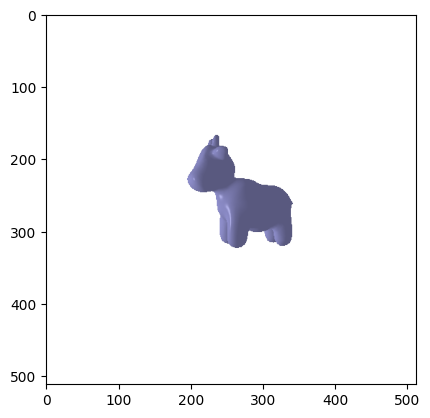

In [89]:
plt.imshow(images_rgb[5])

In [98]:
images_rgb_uint8 = [(img * 255).numpy().astype('uint8') for img in images_rgb]

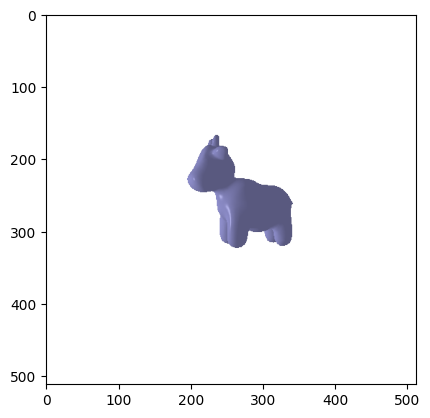

In [99]:
plt.imshow(images_rgb_uint8[5])

In [100]:
imageio.mimsave('cow/360.gif', images_rgb_uint8)

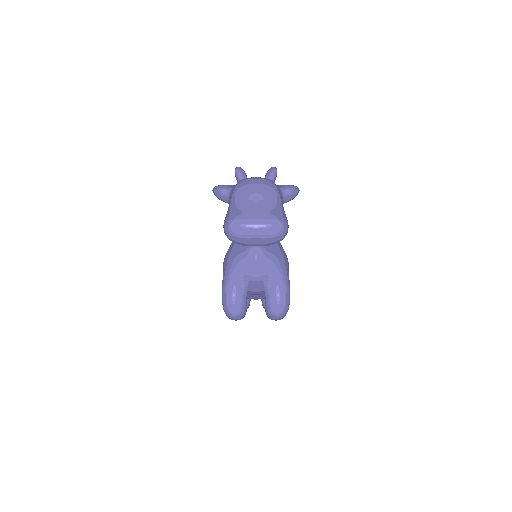

In [101]:
from IPython.display import Image

with open('cow/360.gif','rb') as file:
    display(Image(file.read()))